## Data exploration to find good prospects in the beginning of their career when they are younger and cheaper

FIFA videogame compiles and manages a great amount of information in order to make the gamer's experience the most real possible. One characteristic that the game has is the potential score for players, which indicates the overall that the player can achieve in the future.


It is quite obvious that the videogame has quality information to determine the potential and the purpose of this notebook is to find out if this indicator can be a good tool to find good players in the early years of their career, that are cheaper and could represent a profitable investment over time.

In [1]:
# Modules that are going to be used

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

plt.style.use('seaborn-v0_8')

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
# Importing dataset

players_df = pd.read_csv('/kaggle/input/ea-sports-fc-24-complete-player-dataset/male_players.csv', low_memory=False)

### Data exploration

In [4]:
players_df.shape

(180021, 109)

In [5]:
players_df.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,181500000.0,230000.0,24,1998-12-20,182,75,73.0,Paris Saint Germain,16.0,Ligue 1,1.0,LW,7.0,NaN,2018-07-01,2024.0,18,France,1335.0,LW,10.0,Right,4,5,5,High/Low,Unique,Yes,349400000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical fin...","Quick Step +, Rapid, Flair, Trivela",97.0,90.0,80.0,92.0,36.0,78.0,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88.0,26,34,32,13,5,7,11,6,NaN,90+3,90+3,90+3,91,91,91,91,91,89+3,89+3,89+3,89+3,81+3,81+3,81+3,89+3,68+3,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,2000-07-21,195,94,10.0,Manchester City,13.0,Premier League,1.0,ST,9.0,NaN,2022-07-01,2027.0,36,Norway,1352.0,ST,9.0,Left,3,3,5,High/Medium,Unique,Yes,356100000.0,"#Aerial threat, #Distance shooter, #Strength, ...","Acrobatic +, Power Header, Quick Step",89.0,93.0,66.0,80.0,45.0,88.0,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87.0,38,47,29,7,14,13,11,7,NaN,90+3,90+3,90+3,82,86,86,86,82,82+3,82+3,82+3,79+3,74+3,74+3,74+3,79+3,62+3,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,103000000.0,350000.0,32,1991-06-28,181,75,10.0,Manchester City,13.0,Premier League,1.0,SUB,17.0,NaN,2015-08-30,2025.0,7,Belgium,1325.0,CAM,7.0,Right,5,4,5,High/Medium,Unique,Yes,190600000.0,"#Dribbler, #Playmaker, #Distance shooter, #Cro...","Pinged Pass +, Dead Ball, Incisive Pass, Long ...",72.0,88.0,94.0,87.0,65.0,78.0,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88.0,66,70,53,15,13,5,10,13,NaN,83+3,83+3,83+3,87,88,88,88,87,89+2,89+2,89+2,88+3,90+1,90+1,90+1,88+3,79+3,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,41000000.0,23000.0,36,1987-06-24,169,67,112893.0,Inter Miami,39.0,Major League Soccer,1.0,RF,10.0,NaN,2023-07-16,2025.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Low/Low,Unique,Yes,61500000.0,"#Dribbler, #Playmaker, #FK Specialist, #Acroba...","Technical +, Finesse Shot, Dead Ball, Pinged P...",80.0,87.0,90.0,94.0,33.0,64.0,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96.0,20,35,24,6,11,15,14,8,NaN,85+3,85+3,85+3,90,89,89,89,90,91-1,91-1,91-1,89+1,85+3,85+3,85+3,89+1,64+3,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,

The dataset provides us with all the information that the videogame has about every player. Because of this, there are several columns as shown next.

In [6]:
print(list(players_df.columns))

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

In [7]:
players_df.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_jersey_number,club_contract_valid_until_year,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,180021.000000,180021.000000,180021.0,180021.000000,180021.000000,1.778680e+05,178173.00000,180021.000000,180021.000000,180021.000000,178156.000000,178156.000000,177771.000000,178156.000000,178156.000000,180021.000000,10098.000000,10098.000000,180021.000000,180021.000000,180021.000000,1.207220e+05,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,159997.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,147133.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,180021.000000,20024.000000
mean,217326.670294,19.621450,2.0,65.712711,70.779581,2.379142e+06,10638.01081,25.138689,181.287061,75.233356,45263.728210,221.747991,1.380878,20.302297,2020.816015,55.657218,29845.186671,12.226580,2.939657,2.335689,1.105171,4.878321e+06,68.058839,52.268155,56.995731,62.160484,51.232742,64.824322,49.622605,45.687803,52.205720,58.434510,42.974686,55.296321,47.351876,43.028008,52.709312,58.251404,64.695080,64.866871,63.383000,61.588059,63.951445,56.812672,65.023120,63.068586,65.128474,47.101505,55.714289,46.617700,50.047078,53.187567,48.579993,57.837807,45.851456,47.759511,45.764783,16.509979,16.260136,16.129902,16.276951,16.615517,38.750300
std,35215.749284,2.838621,0.0,7.018104,6.255569,6.184358e+06,21637.41400,4.679389,6.764179,6.999181,53516.528046,467.804515,0.750647,17.054347,2.902942,48.050844,47980.430480,6.911397,0.664775,0.754452,0.381699,1.271795e+07,11.063818,13.920686,10.427677,10.220788,16.580676,9.755666,17.985783,19.281183,17.146296,14.651313,17.449400,18.614112,18.059794,17.196317,15.172114,16.576721,14.789598,14.543439,14.725512,9.144995,14.082868,15.290486,11.898887,15.875722,12.615282,19.051298,17.176139,20.414351,19.231630,14.193916,15.660671,12.305995,20.452502,21.309061,20.899683,17.661659,16.846583,16.499513,17.009393,17.971201,10.578237
min,2.000000,15.000000,2.0,40.000000,40.000000,1.000000e+03,500.00000,16.000000,154.000000,49.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,974.000000,1.000000,1.000000,1.000000,1.000000,9.000000e+03,21.000000,14.000000,20.000000,22.000000,14.000000,27.000000,5.000000,2.000000,4.000000,7.000000,3.000000,2.000000,4.000000,3.000000,5.000000,5.000000,11.000000,11.000000,11.000000,20.000000,10.000000,2.000000,13.000000,10.000000,12.000000,3.000000,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,200759.000000,17.000000,2.0,61.000000,66.000000,3.250000e+05,2000.00000,21.000000,176.000000,70.000000,450.000000,19.000000,1.000000,8.000000,2019.000000,21.000000,1343.000000,6.000000,3.000000,2.0

### Data preparation

First we need to filter the columns that we are going to use. The columns that I excluded are commented just to know what I use and what I left behind.

In [8]:
players_df = players_df[['player_id', 
 # 'player_url',
 'fifa_version',
 #'fifa_update', 'update_as_of',
 'short_name',  'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
 # 'dob',  'height_cm', 'weight_kg', 'club_team_id',
 'club_name',
 #'league_id',
 'league_name', 'league_level', 'club_position',
 # 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
 'nationality_name',
 # 'nation_team_id',
 'nation_position',
 # 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
 'international_reputation',
 # 'work_rate', 'body_type', 'real_face', 
 'release_clause_eur', 
 # 'player_tags', 'player_traits', 'pace', 'shooting',
 #'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 # 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 # 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
 # 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
 # 'mentality_interceptions', 'mentality_positioning',  'mentality_vision', 'mentality_penalties', 'mentality_composure',
 # 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 # 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
 # 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'
            ]].copy()

Next, it is important to verify that the data types of the remaining columns are good for the purpose of the analysis. By fortune, the dataset has all the data types in order, so no changes are necessary.

In [9]:
players_df.dtypes

player_id                     int64
fifa_version                float64
short_name                   object
long_name                    object
player_positions             object
overall                       int64
potential                     int64
value_eur                   float64
wage_eur                    float64
age                           int64
club_name                    object
league_name                  object
league_level                float64
club_position                object
nationality_name             object
nation_position              object
international_reputation      int64
release_clause_eur          float64
dtype: object

Checking the shape of the dataframe, we have 180021 values and 18 columns.


It is important to clarify that this does not mean we have 180021 players, as a particular player can repeat himself in different FIFA versions.

In [10]:
players_df.shape

(180021, 18)

Next, I check on the missing values, finding missing values in columns where we can find and explanation, maybe because the player is not part of his national team or is a free agent. The most important columns present all the required values, which is excellent.

In [11]:
players_df.isna().sum()

player_id                        0
fifa_version                     0
short_name                       0
long_name                        0
player_positions                 0
overall                          0
potential                        0
value_eur                     2153
wage_eur                      1848
age                              0
club_name                     1865
league_name                   1865
league_level                  2250
club_position                 1865
nationality_name                 0
nation_position             169923
international_reputation         0
release_clause_eur           59299
dtype: int64

Finally in the data frame preparation, I check on duplicate values in the dataset, finding no duplicates.

In [12]:
players_df.loc[players_df.duplicated]

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,nation_position,international_reputation,release_clause_eur


## Data exploration

We are looking for young players with good potential and that have a low cost. Considering this, we filter the dataframe to get players with 23 or fewer years of age, that have a potential equal or greater than 83 and that have a current value of 2 million EUR.

It is important to highlight that we are not looking for every good prospect player in the game, we are looking for good prospects that were cheaper opportunities at the beginning of their careers. This is why we are not going to find players that were great and cost a lot just right at the beginning of their careers, for example Marcus Rashford, Jude Bellingham etc. Also, there are not players that where startng their carrer befor 2015, which is the oldest year that are consider in the dataset.

In [13]:
condition = (
    (players_df['potential'] >= 83) & (players_df['age'] <= 23) & (players_df['value_eur'] <= 2000000)
)

players_ids = list(players_df.loc[condition]['player_id'])

top_players_df = players_df[players_df['player_id'].isin(players_ids)].sort_values(by = ['player_id', 'fifa_version']).copy()


Considering multiple records of players over the different FIFA versions, we find 53111 different players from FIFA 15 to FC 24

In [14]:
players_df['player_id'].value_counts().count()

53111

The total number of good prospect players is just 53

In [15]:
top_players_df['player_id'].value_counts().count()

395

We already have young players with good potential and a reasonable cost, but we need to be sure that those players achieved their potential or at least became decent players. For this reason, I filtered the dataframe to get players that in some moment of their career had 80 or more of overall

In [16]:
players_ids = list(top_players_df.loc[top_players_df['overall'] >= 80]['player_id'])
top_players_df = top_players_df[top_players_df['player_id'].isin(players_ids)].sort_values(by = ['player_id', 'fifa_version']).copy()
top_players_df.shape


(429, 18)

Counting again, I found that the number does not change, so all the players that originally were filtered as good prospects in their young age became at least decent players in some part of their career.

In [17]:
top_players_df['player_id'].value_counts().count()

53

Another important thing to look on is that the players must be in at least 2 or more versions of the game, otherwise we can not if that player improved and increased his value. I found that the number of players is still the same, which is good.

In [18]:
valueCounts = top_players_df['short_name'].value_counts()
top_players_df = top_players_df[top_players_df['short_name'].isin(valueCounts.index[valueCounts > 1])].copy()
top_players_df['short_name'].value_counts().count()


53

Now I believe it is important to create a dataframe with the information of every player in his first season inside the game, where they are actually prospects

In [19]:
start_players_df = top_players_df[top_players_df['short_name'].duplicated() == False]
start_players_df.head(3)

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,nation_position,international_reputation,release_clause_eur
165745,193105,15.0,A. Areola,Alphonse Areola,GK,72,84,1900000.0,20000.0,21,Bastia,Ligue 2,1.0,GK,France,NaN,1,NaN
165746,203042,15.0,J. Butland,Jack Butland,GK,72,84,1900000.0,20000.0,21,Stoke City,Championship,1.0,RES,England,NaN,1,NaN
165372,203574,15.0,J. Stones,John Stones,"CB, RB",73,83,1800000.0,25000.0,20,Everton,Premier League,1.0,RCB,England,RB,1,NaN


Some interesting insight is to now the nationalities where this good players are coming from and actually compare it with the nationality of all the players that are part of the game.

What we found is that players from countries included in the big 5 leagues (from England, Spain, Germany, Italy and France), along with Argentina and Brazil are the most numerous inside the game. We identify the the relationship between this number of players and the number of good prospect players is proportional, excepting maybe Italy that gives less number of good prospect players comparing with the total number of players.

Countries like Portugal and the Netherlands actually presents a good relationship between the number of good prospects and the number of players, what can indicates that those two leagues are good leagues to find great young players at a low cost.

Finally there are countries that relate only just one good prospect player, which is not really a good base to buld conclusion on, what can be said is that countries like Poland, Colombia, Chile, Korea, Sauidi Arabia and China includes a good amount of players but any of them represent a good economic oportunity at the beggining of their carrer, maybe due to the fact that any player became a good player with an overall greater than 80, that they were not cheap enough at the beggining of their carrer or that simply any player present a good potential according to the game information.

Text(0, 0.5, 'Number of players')

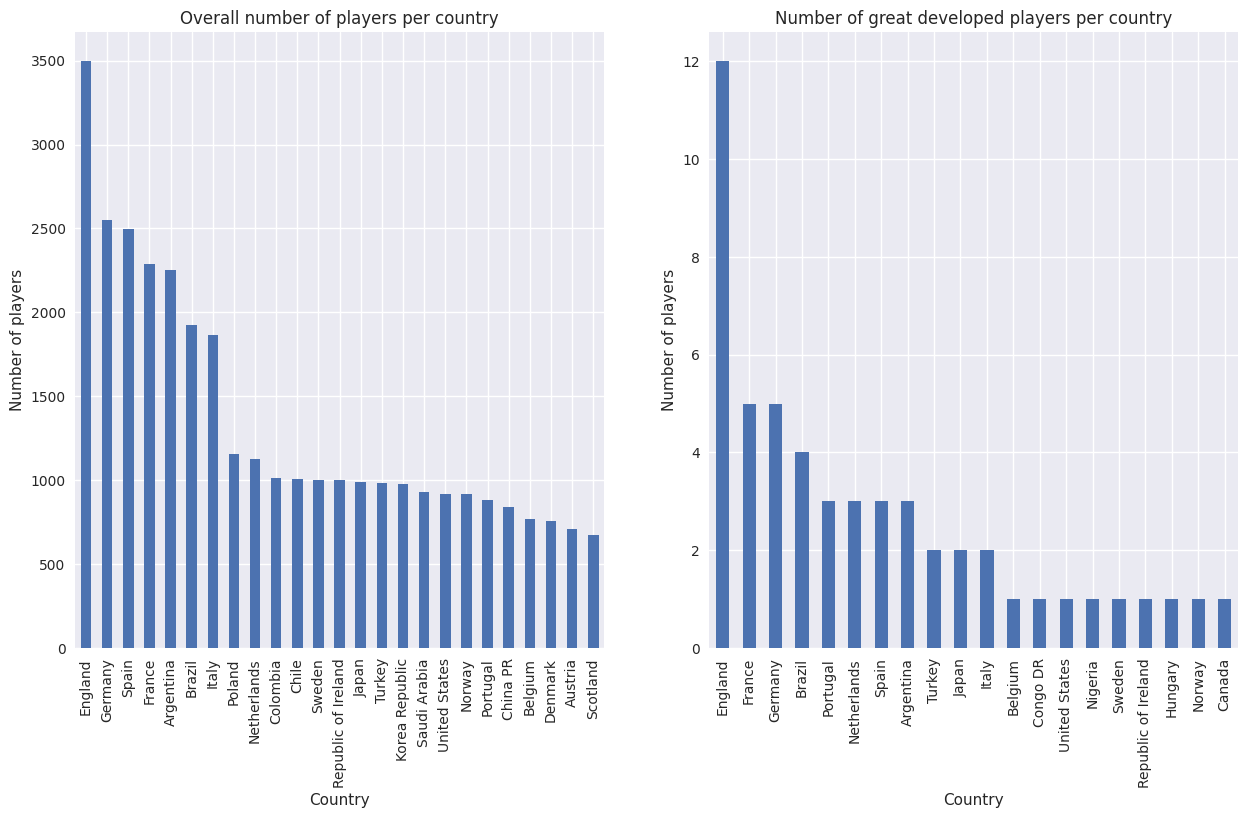

In [20]:


fig, axes = plt.subplots(nrows=1, ncols=2)


country = players_df[players_df['short_name'].duplicated() == False]['nationality_name'].value_counts().head(25)\
.plot(ax=axes[0], kind = 'bar', title = 'Overall number of players per country', figsize=(15, 8))

country.set_xlabel('Country')
country.set_ylabel('Number of players')

country1 = start_players_df['nationality_name'].value_counts().plot(ax=axes[1], kind = 'bar', title = 'Number of great developed players per country')

country1.set_xlabel('Country')
country1.set_ylabel('Number of players')

We can take a look at the number of players by country in a more appealing and informative way with an imshow plot. Here I wanted to filter the countries that present more than 200 players in any of the FIFA versions considered in the dataset and then have the option to verify the number of players in each of the game versions.

In [21]:
players_per_country = players_df.groupby(['fifa_version','nationality_name'])['player_id'].count().reset_index()
players_per_country = players_per_country.sort_values(by = ['fifa_version', 'player_id'], ascending = False).copy()

players_ids = list(players_per_country.loc[players_per_country['player_id'] > 200]["nationality_name"])
players_per_country = players_per_country[players_per_country['nationality_name'].isin(players_ids)].copy()
players_per_country.count()


fifa_version        350
nationality_name    350
player_id           350
dtype: int64

In [22]:
#new_df = players_per_country.groupby(['fifa_version','nationality_name'])['player_id'].count().reset_index()
#new_df = new_df.sort_values(by = ['player_id']).query('player_id > 300' )
new_df = players_per_country.pivot(index='nationality_name', columns='fifa_version')['player_id'].fillna(0)


fig = px.imshow(new_df, x=new_df.columns, y=new_df.index)
fig.update_layout(width=700,height=1000)
fig.show()

Now I am interested in the leagues where these players started their careers. Surprisingly, the Bundesliga is the second league that has the most promising players, with a great difference from the third, making this league one of the most appealing in order to find good opportunities. Unsurprisingly, the Premier League is the league that has the most prospect players; however, the difference with the Bundeliga is just one player.

Text(0, 0.5, 'League')

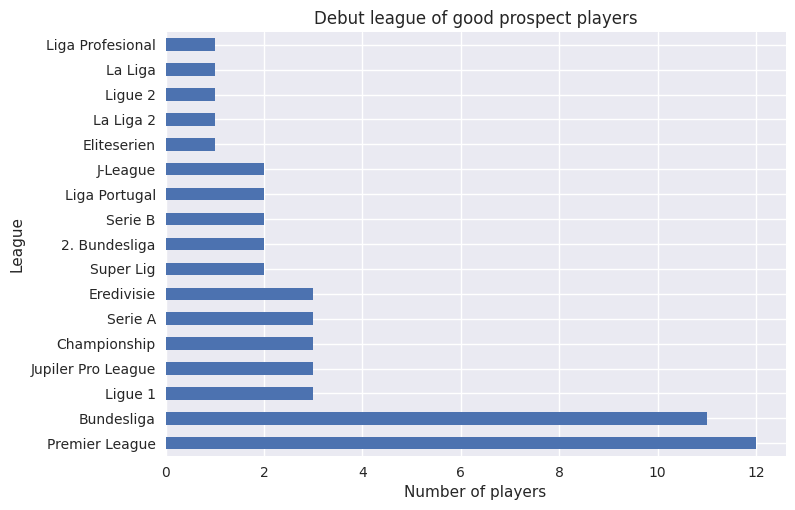

In [23]:
league = start_players_df['league_name'].value_counts().plot(kind = 'barh', title = 'Debut league of good prospect players')

league.set_xlabel('Number of players')
league.set_ylabel('League')

It is interesting to find leagues like the J-League from Japan and the Eliteserien from Norway, so I wanted to know which players started in those leagues. We have Daichi Kamada and Takefusa Kubo from Japan and Erling Haaland from Norway.

In [24]:
start_players_df.query('league_name == "J-League"')

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,nation_position,international_reputation,release_clause_eur
136957,232730,17.0,D. Kamada,鎌田 大地,"CAM, CM",67,83,1500000.0,3000.0,19,Sagan Tosu,J-League,1.0,CAM,Japan,NaN,1,NaN
105364,237681,19.0,T. Kubo,久保 建英,"CAM, RM, ST, LM",63,86,800000.0,1000.0,17,Yokohama F. Marinos,J-League,1.0,SUB,Japan,NaN,1,NaN


In [25]:
start_players_df.query('league_name == "Eliteserien"')

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,nation_position,international_reputation,release_clause_eur
127108,239085,18.0,E. Haaland,Erling Braut Haaland,ST,58,78,250000.0,1000.0,16,Molde,Eliteserien,1.0,SUB,Norway,NaN,1,563000.0


It is interesting that in FIFA 18 we could not know the great potential that Haaland had, so taking a look at this player in every FIFA version we find that in FIFA 19 we find the captivating potential. It is interesting to know that in that version he was still in Molde and his value was 1.500.000 EUR, far from the 185.000.000 EUR he has in FC 24.

This can be taken as a sign that FIFA could actually be a good tool to find good players in real life.

In [26]:
players_df.query('player_id == 239085')

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,nation_position,international_reputation,release_clause_eur
1,239085,24.0,E. Haaland,Erling Braut Haaland,ST,91,94,185000000.0,340000.0,22,Manchester City,Premier League,1.0,ST,Norway,ST,5,356100000.0
18370,239085,23.0,E. Haaland,Erling Braut Haaland,ST,88,94,148000000.0,220000.0,21,Manchester City,Premier League,1.0,ST,Norway,ST,4,303400000.0
36905,239085,22.0,E. Haaland,Erling Braut Haaland,ST,88,93,137500000.0,110000.0,20,Borussia Dortmund,Bundesliga,1.0,RS,Norway,LS,4,244100000.0
56221,239085,21.0,E. Haaland,Erling Braut Haaland,ST,84,92,92000000.0,56000.0,19,Borussia Dortmund,Bundesliga,1.0,LS,Norway,RS,2,85500000.0
77674,239085,20.0,E. Haaland,Erling Braut Haaland,ST,73,85,6500000.0,12000.0,18,Salzburg,Bundesliga,1.0,LS,Norway,NaN,1,11100000.0
101035,239085,19.0,E. Haaland,Erling Braut Haaland,ST,67,84,1500000.0,2000.0,17,Molde,Eliteserien,1.0,ST,Norway,NaN,1,2900000.0
127108,239085,18.0,E. Haaland,Erling Braut Haaland,ST,58,78,250000.0,1000.0,16,Molde,Eliteserien,1.0,SUB,Norway,NaN,1,563000.0


One interesting attribute in the dataset is the level assigned to every league. We found that almost all the players started in a first-level league.

In [27]:
fig = px.pie(start_players_df, names ='league_level' )
fig.show()

However, almost 10 percent of the players came from leagues with levels 2 or 3. Here we can see which players are related to these low-level leagues.

Overall, these leagues are the second-level leagues of important leagues in the world (Germany, England, Spain and Italy)

In [28]:
start_players_df.query('league_level > 1.0')

,player_id,fifa_version,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,club_name,league_name,league_level,club_position,nationality_name,nation_position,international_reputation,release_clause_eur
167789,213331,15.0,J. Tah,Jonathan Tah,"CB, RB",68,83,600000.0,3000.0,18,Fortuna Düsseldorf,2. Bundesliga,2.0,SUB,Germany,NaN,1,NaN
177561,220697,15.0,J. Maddison,James Maddison,"ST, CAM",56,74,80000.0,2000.0,17,Coventry City,Championship,3.0,SUB,England,NaN,1,NaN
135057,231352,17.0,T. Abraham,Tammy Bakumo-Abraham,ST,69,85,2000000.0,20000.0,18,Bristol City,Championship,2.0,ST,England,NaN,1,NaN
119265,239231,18.0,Cucurella,Marc Cucurella Saseta,LB,67,85,1400000.0,3000.0,18,FC Barcelona B,La Liga 2,2.0,LB,Spain,NaN,1,3000000.0
102152,241096,19.0,S. Tonali,Sandro Tonali,"CDM, CM",66,88,1300000.0,1000.0,18,Brescia,Serie B,2.0,CM,Italy,NaN,1,3400000.0


We can take a general look at the profitability of buying and selling these players, so I calculate buying the player at his lowest price and selling him at his highest price. With these prices, I also calculated the return on investment, and I ordered the records from the highest to the lowest return.

Obviously, this is a general frame and real life does not work like this.
 

In [29]:
profit = top_players_df.groupby('short_name')['value_eur'].agg(lambda x: x.max() - x.min())
profit.columns = ['short_name', 'value_eur']
profit_df = pd.DataFrame(profit)
# profit_df.sort_values(by  = ['value_eur'], ascending = False)

In [30]:
roi = top_players_df.groupby('short_name')['value_eur'].agg(lambda x: (x.max() - x.min()) / abs(x.min()) * 100)
roi_df = pd.DataFrame(roi)
# roi_df.rename(columns = {'value_eur' : 'ROI'}).sort_values(by  = ['ROI'], ascending = False)

Besides Haaland, there are players that are kind of a surprise, like James Maddison and Dayot Upamecano with the highest returns, or Marcus Edwards and Houssem Aouar in lower levels but with good returns.


In [31]:
finantial_df = pd.merge(profit_df,roi_df, on = 'short_name' )
finantial_df.rename(columns = {'value_eur_x': 'profit', "value_eur_y": 'ROI'}).sort_values(by  = ['ROI'], ascending = False).head(15)

,profit,ROI
short_name,,
E. Haaland,184750000.0,73900.000000
J. Maddison,49420000.0,61775.000000
D. Rice,62830000.0,36958.823529
D. Upamecano,63770000.0,27726.086957
M. Mount,58270000.0,25334.782609
R. James,56700000.0,18900.000000
M. de Ligt,98425000.0,17117.391304
J. Sancho,123200000.0,15400.000000
K. Coman,80475000.0,15328.571429


Just for fantasy purposes, here is the sum of all the profit if we buy and sell the players from their lowest to their highest prices.

In [32]:
pd.set_option('float_format', '{:f}'.format)
profit_df.sum()

value_eur   3040765000.000000
dtype: float64

Another good insight we can get is the relationship between salary and overall price, as presented below.

In [33]:
fig = px.scatter(top_players_df, x = 'value_eur', y = 'wage_eur', color = 'short_name', 
                     title = 'Relationship between player value and wage',
                    labels = {"value_eur": "Value (EUR)",
                             "wage_eur": "Wage (EUR)",
                             "short_name" : "Player name"},
                    hover_data = ['fifa_version', "club_name"])
fig.show()

It is important to take a look at good-prospect players on the field, so I wanted to find out which positions they played in their first season. I found that they were substitutes in the majority.

In [34]:
fig = px.histogram(top_players_df, 
                   x = "club_position", 
                   color = 'fifa_version',
                  title = 'Top positions for prospect players',
                  labels = {'count': 'Number of players', 
                            'club_position': 'Player position',
                              'fifa_version' : 'Fifa version'},
                  color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Finally, in this data exploration, I wanted to find insights about the overall score of the players. We have a chart with the overall season by season in every FIFA version and a plot with the overall average.

What this helps us to find is the more consistent players, or the players that presented a good level in most parts of their careers.

In [35]:
fig = px.bar(top_players_df, x = "short_name", 
             y = "overall", color = 'fifa_version',
             title = 'Overall player score by FIFA version',
             labels = {'short_name':'Player name',
                      'overall': 'Overall score',
                      'fifa_version' : 'Fifa version'},
            color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [36]:
avg_overall = top_players_df.groupby('short_name')['overall'].mean().reset_index()

avg_overall = avg_overall.sort_values(by='overall', ascending=False)


In [37]:
avg_temp = avg_overall[avg_overall['overall']>76].reset_index()
fig = px.bar(avg_temp, x = "short_name", 
             y = "overall", 
             color = 'short_name',
             title = 'Average overall player score by FIFA version',
             labels = {'short_name':'Player name',
                      'overall': 'Overall score'},
             template='seaborn',
             color_discrete_sequence=px.colors.qualitative.G10,
)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()